# CART (Classification and Regression Trees)

Load `beer.csv` and plot a Tree against price and all other predictors.

Installing package into ‘/opt/homebrew/lib/R/4.5/site-library’
(as ‘lib’ is unspecified)



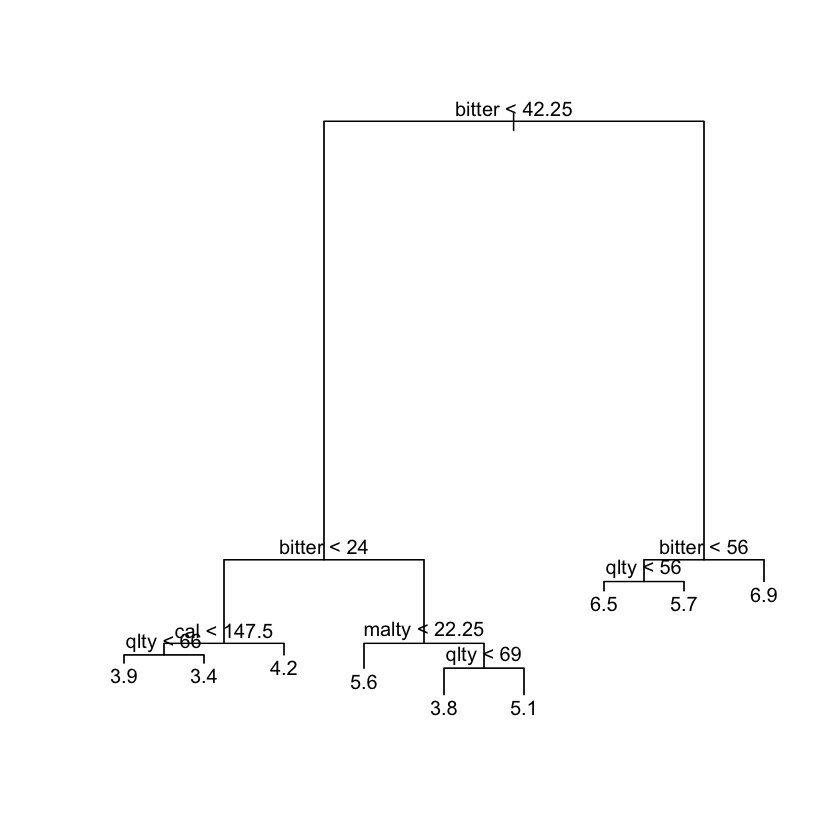

In [45]:
install.packages("tree")
library(tree)
beerdat <- read.csv('beer.csv')
beerdat <- beerdat[,-1]
beerTree <- tree(price ~ ., data = beerdat)
plot(beerTree)
text(beerTree, digits = 2)

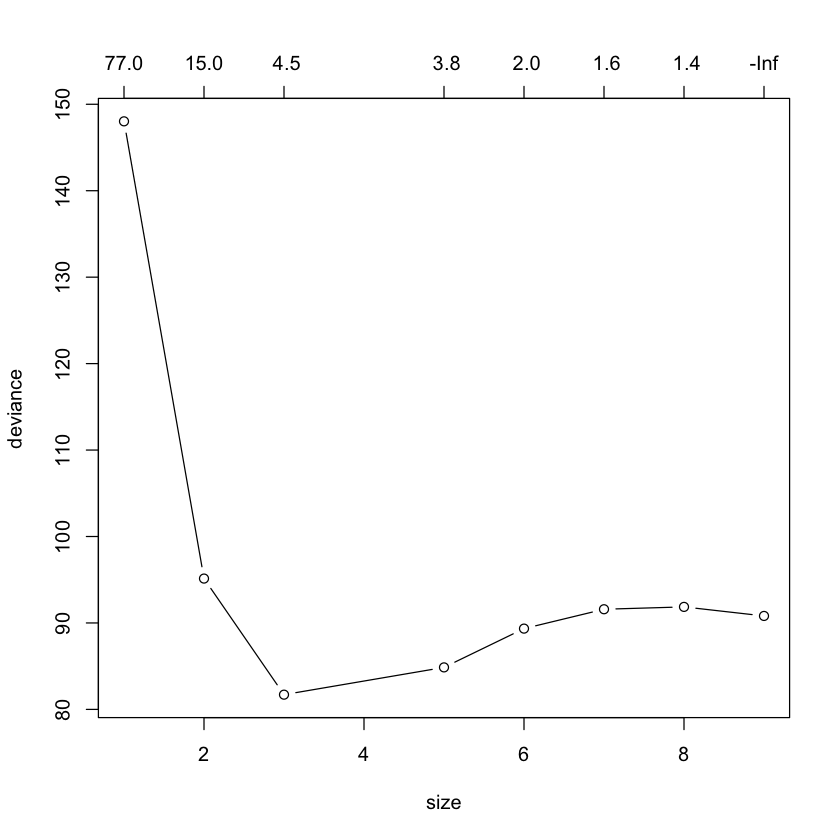

In [46]:
cvBeerTree <- cv.tree(beerTree)
plot(cvBeerTree, type="b")

Do cross-validation on the Tree to determine the best size of the tree (size of the tree is amount of terminal nodes). Note that the `CV` method is non-deterministic.

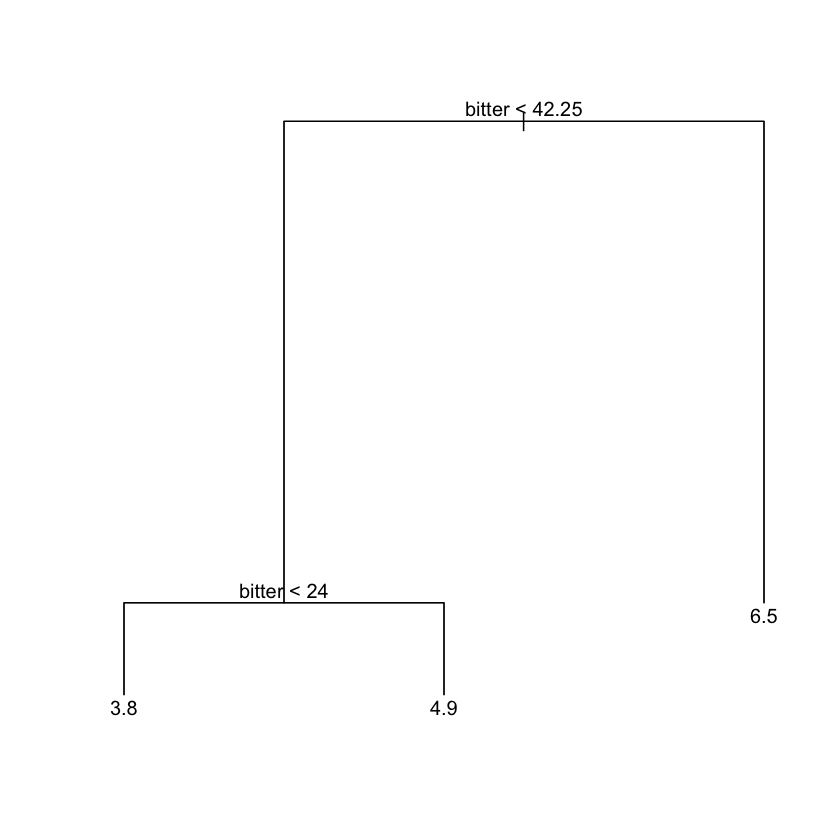

In [47]:
prunedBeerTree <- prune.tree(beerTree, best = 3)
plot(prunedBeerTree)
text(prunedBeerTree, digits = 2)

In [48]:
cvBeerTree

$size
[1] 9 8 7 6 5 3 2 1

$dev
[1]  90.81107  91.85752  91.58553  89.34545  84.85995  81.70415  95.13476
[8] 148.02603

$k
[1]      -Inf  1.446143  1.635251  2.024305  3.848303  4.524887 14.771353
[8] 77.385186

$method
[1] "deviance"

attr(,"class")
[1] "prune"         "tree.sequence"

In [49]:
install.packages(c("rpart", "randomForest", "gbm", "caret", "MASS"))
library(rpart)
library(randomFores t)
library(gbm)
library(caret)
library(MASS)

ERROR: Error in parse(text = input): <text>:3:21: unexpected symbol
2: library(rpart)
3: library(randomFores t
                       ^


1. `formula` has the syntax `response ~ predictors`
2. `data`
3. `method`
4. `control`

`rpart(formula, data, method, control)`

In [ ]:
data(iris)
random_forest_class <- randomForest(Species ~., data = iris, ntree = 500, mtry = 2, importance = TRUE)
random_forest_reg <- randomForest(medv ~ ., data = Boston, ntree = 500, mtry = 6, importance = TRUE)

`formula` describes the response and predictors

`data` is the dataset used for training

`ntree` is the number of trees in the forest

`mtry` is the number of variables randomly sampled at each split

`importance` measures the importance feature for each prediction

In [ ]:
random_forest_class
random_forest_reg


Call:
 randomForest(formula = Species ~ ., data = iris, ntree = 500,      mtry = 2, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 4.67%
Confusion matrix:
           setosa versicolor virginica class.error
setosa         50          0         0        0.00
versicolor      0         47         3        0.06
virginica       0          4        46        0.08


Call:
 randomForest(formula = medv ~ ., data = Boston, ntree = 500,      mtry = 6, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 6

          Mean of squared residuals: 9.509018
                    % Var explained: 88.74

`$predicted` is the predicted values for each class

`$importance` is the importance measures of each variable

`$ntree` is the number of trees grown in the forest

`$mtry` is the number of variables at each split

## Classification Trees

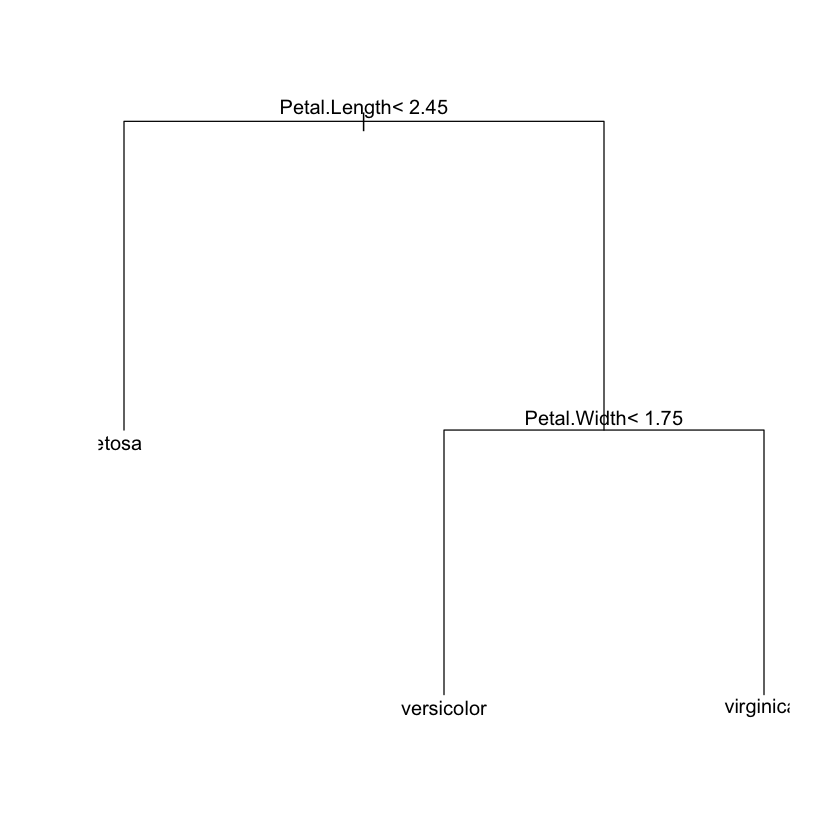

In [ ]:
trainIndex <- createDataPartition(iris$Species, p = 0.7, list = FALSE)
trainData <- iris[trainIndex, ]
testData <- iris[-trainIndex, ]
ct_model <- rpart(Species ~ ., data = trainData, method="class")

plot(ct_model)
text(ct_model)

Note that in this case, the Tree has already been pruned.

We now evaluate the performance of the model.

In [ ]:
predictions <- predict(ct_model, newdata = testData, type = "class")
conf_matrix <- confusionMatrix(predictions, testData$Species)
print(conf_matrix)

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         15         1
  virginica       0          0        14

Overall Statistics
                                          
               Accuracy : 0.9778          
                 95% CI : (0.8823, 0.9994)
    No Information Rate : 0.3333          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9667          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            1.0000           0.9333
Specificity                 1.0000            0.9667           1.0000
Pos Pred Value              1.0000            0.9375           1.0000
Neg Pred Value              1.0000            1.0000           0.9677
P

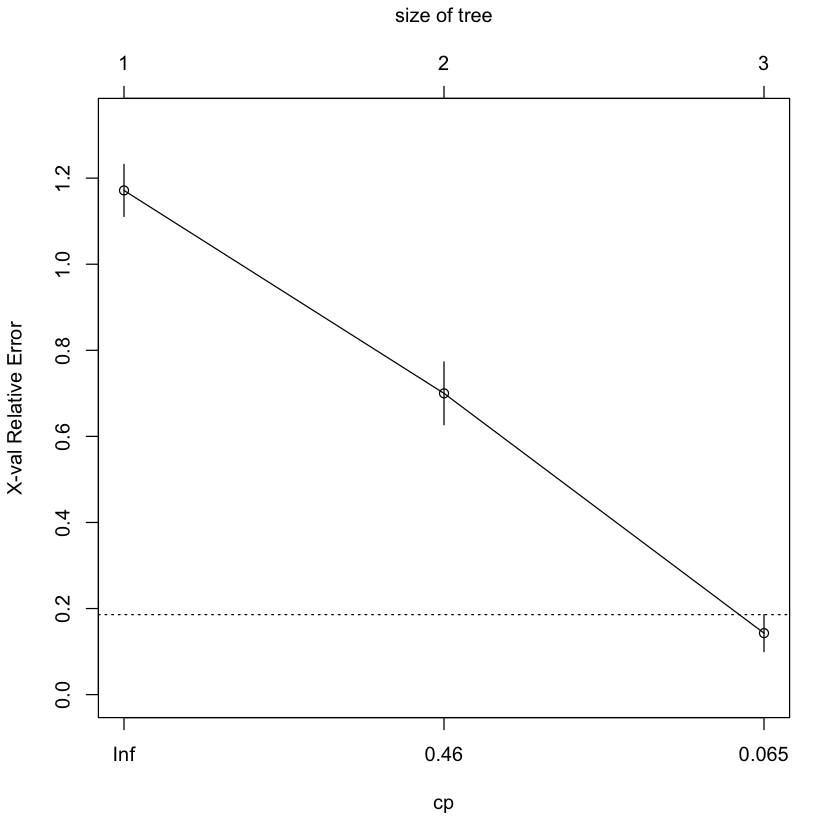

In [ ]:
plotcp(ct_model)

`rpart` uses cross validation to prune the tree and obtain the optimal size using cost complextity pruning. In this case `cp` is the $\alpha$ value found in the cost complexity pruning forumla.

## Regression

In [ ]:
train_index <- createDataPartition(Boston$medv, p = 0.7, list = FALSE)
train_boston <- Boston[train_index, ]
test_boston <- Boston[-train_index, ]
rt_model <- rpart(medv ~ ., data = train_boston, method = "anova")
rt_model

n= 356 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 356 29506.5600 22.45393  
   2) rm< 6.9715 307 11920.6900 19.93257  
     4) lstat>=14.4 123  2246.5340 14.88293  
       8) crim>=6.99237 51   545.0918 11.72353 *
       9) crim< 6.99237 72   831.7787 17.12083 *
     5) lstat< 14.4 184  4441.1980 23.30815  
      10) lstat>=5.145 166  2637.8180 22.48614  
        20) lstat>=9.95 77   514.3317 20.61039 *
        21) lstat< 9.95 89  1618.1730 24.10899 *
      11) lstat< 5.145 18   656.7978 30.88889 *
   3) rm>=6.9715 49  3406.3420 38.25102  
     6) rm< 7.435 26   804.4188 32.86538 *
     7) rm>=7.435 23   995.2948 44.33913  
      14) ptratio>=15.4 11   566.8873 40.34545 *
      15) ptratio< 15.4 12    92.1400 48.00000 *

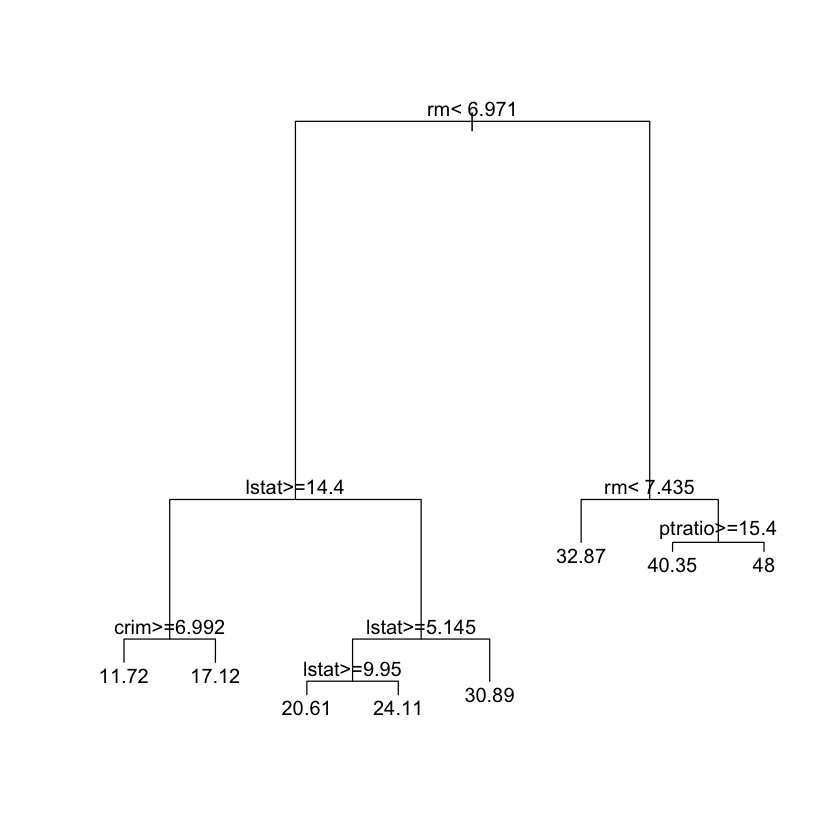

In [ ]:
plot(rt_model)
text(rt_model)

If we did not want the tree to be pruned, we can set the cost complexity parameter $\alpha$ to be 0.

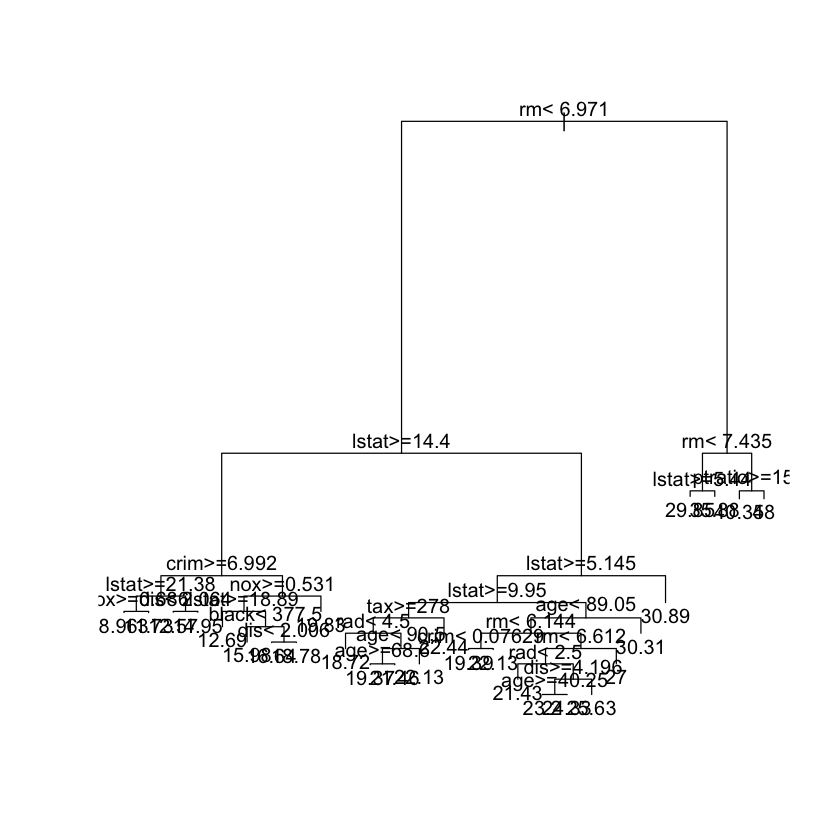

In [50]:
bushy_tree <- rpart(
    formula = medv ~ .,
    data    = train_boston,
    method  = "anova", 
    control = list(cp = 0) # set the cost complexity parameter to 0 
)
plot(bushy_tree)
text(bushy_tree)

To see if pruning is neccessary, we can do the following. 

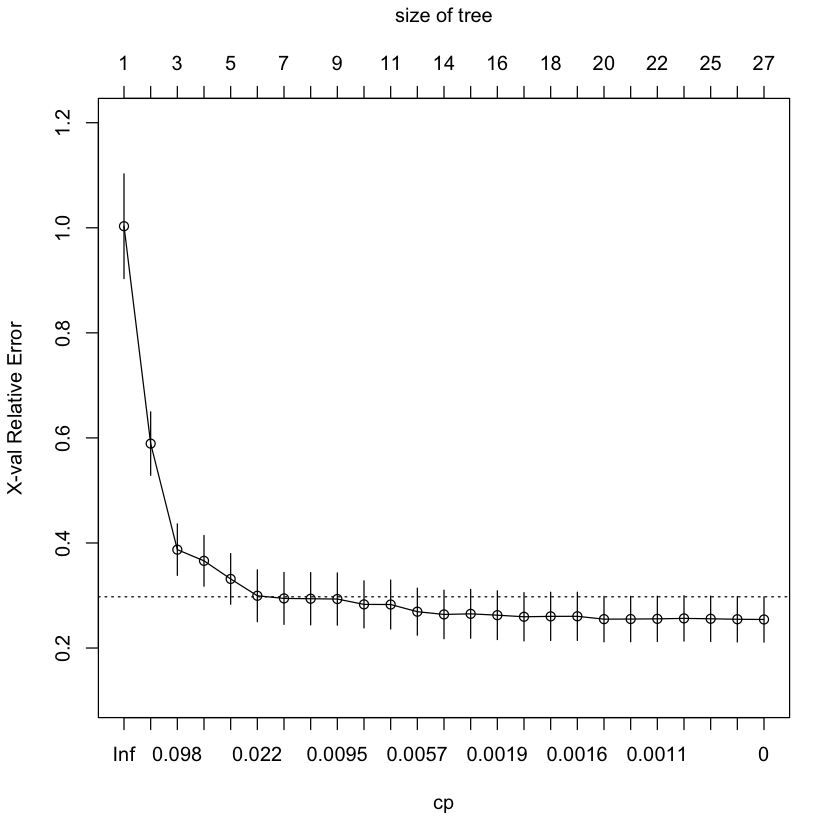

In [51]:
plotcp(bushy_tree)

Choose the tree where the error is within one standard error of the minimum error (this is the dotted line)

In [52]:
# Predict the median house value on the test data
predictions_reg <- predict(rt_model, newdata = test_boston)

# Calculate Mean Squared Error
mse <- mean((predictions_reg - test_boston$medv)^2)
mse

[1] 22.86061

## Bagging for Classification and Regression

In [53]:
rf_model <- randomForest(Species ~ ., data = trainData, 
                         ntree = 100, importance=TRUE)
rf_model


Call:
 randomForest(formula = Species ~ ., data = trainData, ntree = 100,      importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 100
No. of variables tried at each split: 2

        OOB estimate of  error rate: 7.62%
Confusion matrix:
           setosa versicolor virginica class.error
setosa         35          0         0  0.00000000
versicolor      0         32         3  0.08571429
virginica       0          5        30  0.14285714

In [55]:
rf_pred <- predict(rf_model, newdata = testData)

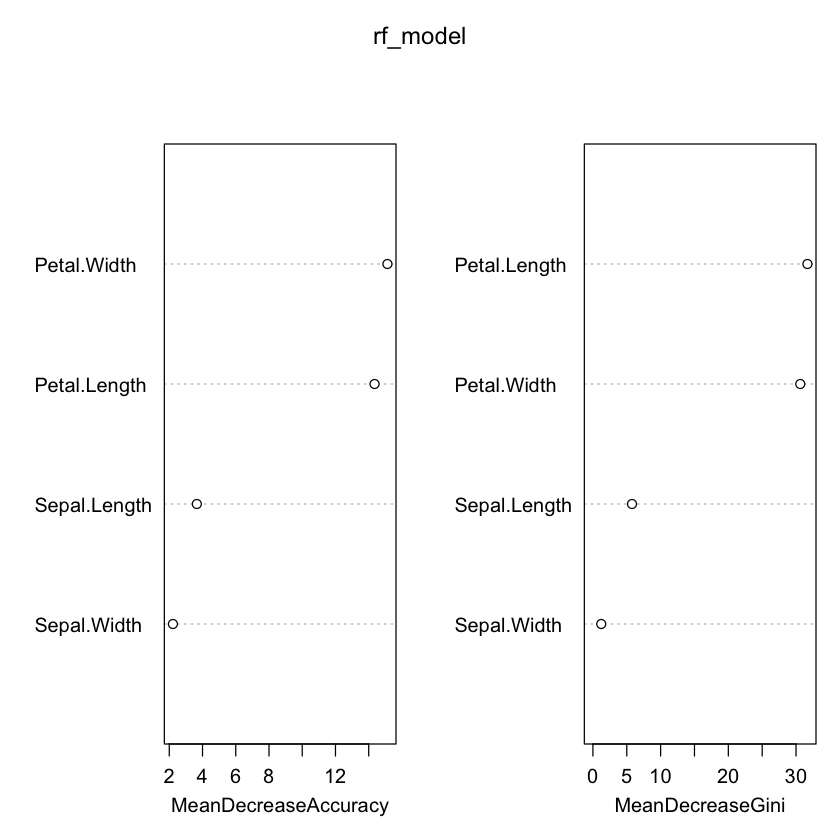

In [56]:
varImpPlot(rf_model)

In [57]:
rf_conf_mat = confusionMatrix(rf_pred, testData$Species)
rf_conf_mat

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         15         1
  virginica       0          0        14

Overall Statistics
                                          
               Accuracy : 0.9778          
                 95% CI : (0.8823, 0.9994)
    No Information Rate : 0.3333          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9667          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            1.0000           0.9333
Specificity                 1.0000            0.9667           1.0000
Pos Pred Value              1.0000            0.9375           1.0000
Neg Pred Value              1.0000            1.0000           0.9677
P

## Regression with Bagging

In [58]:
rf_model_reg <- randomForest(medv ~ ., data = train_boston, ntree = 100)
print(rf_model_reg)


Call:
 randomForest(formula = medv ~ ., data = train_boston, ntree = 100) 
               Type of random forest: regression
                     Number of trees: 100
No. of variables tried at each split: 4

          Mean of squared residuals: 12.01121
                    % Var explained: 85.51


In [61]:
rf_pred_reg <- predict(rf_model_reg, newdata = test_boston)
mse_rf <- mean((rf_pred_reg - test_boston$medv)^2)
print(mse_rf)

[1] 11.51067
